Intercept:  0.23942881559695117
Coefficient:  [ 3.77493610e-05  4.15684258e-04 -4.74831393e-03  9.33546097e-06
  1.00561820e-03 -3.79901350e-04  2.10191601e+01  9.05183227e+02
  1.57249048e+02  1.04044619e-01 -6.20849169e+01 -1.78574283e+00
  2.86098823e-01  2.19520800e+02 -1.83592815e+00  8.10415141e-01
 -7.32867252e+01 -3.94900497e-01 -8.73898457e-03 -1.14656287e-02
  9.46664121e-02]
MLP performance:
MAE:  0.03342908757089657
MSE:  0.0019515142717310664
RMSE:  0.044175946755344885
RMSE (Normalized):  0.062241822445667096
R^2:  0.772612577849233
Baseline performance:
MAE:  0.0695466709192093
MSE:  0.00858985939658234
RMSE:  0.09268149435881114
RMSE (Normalized):  0.13058384798922876
R^2:  -0.0008771204598043703


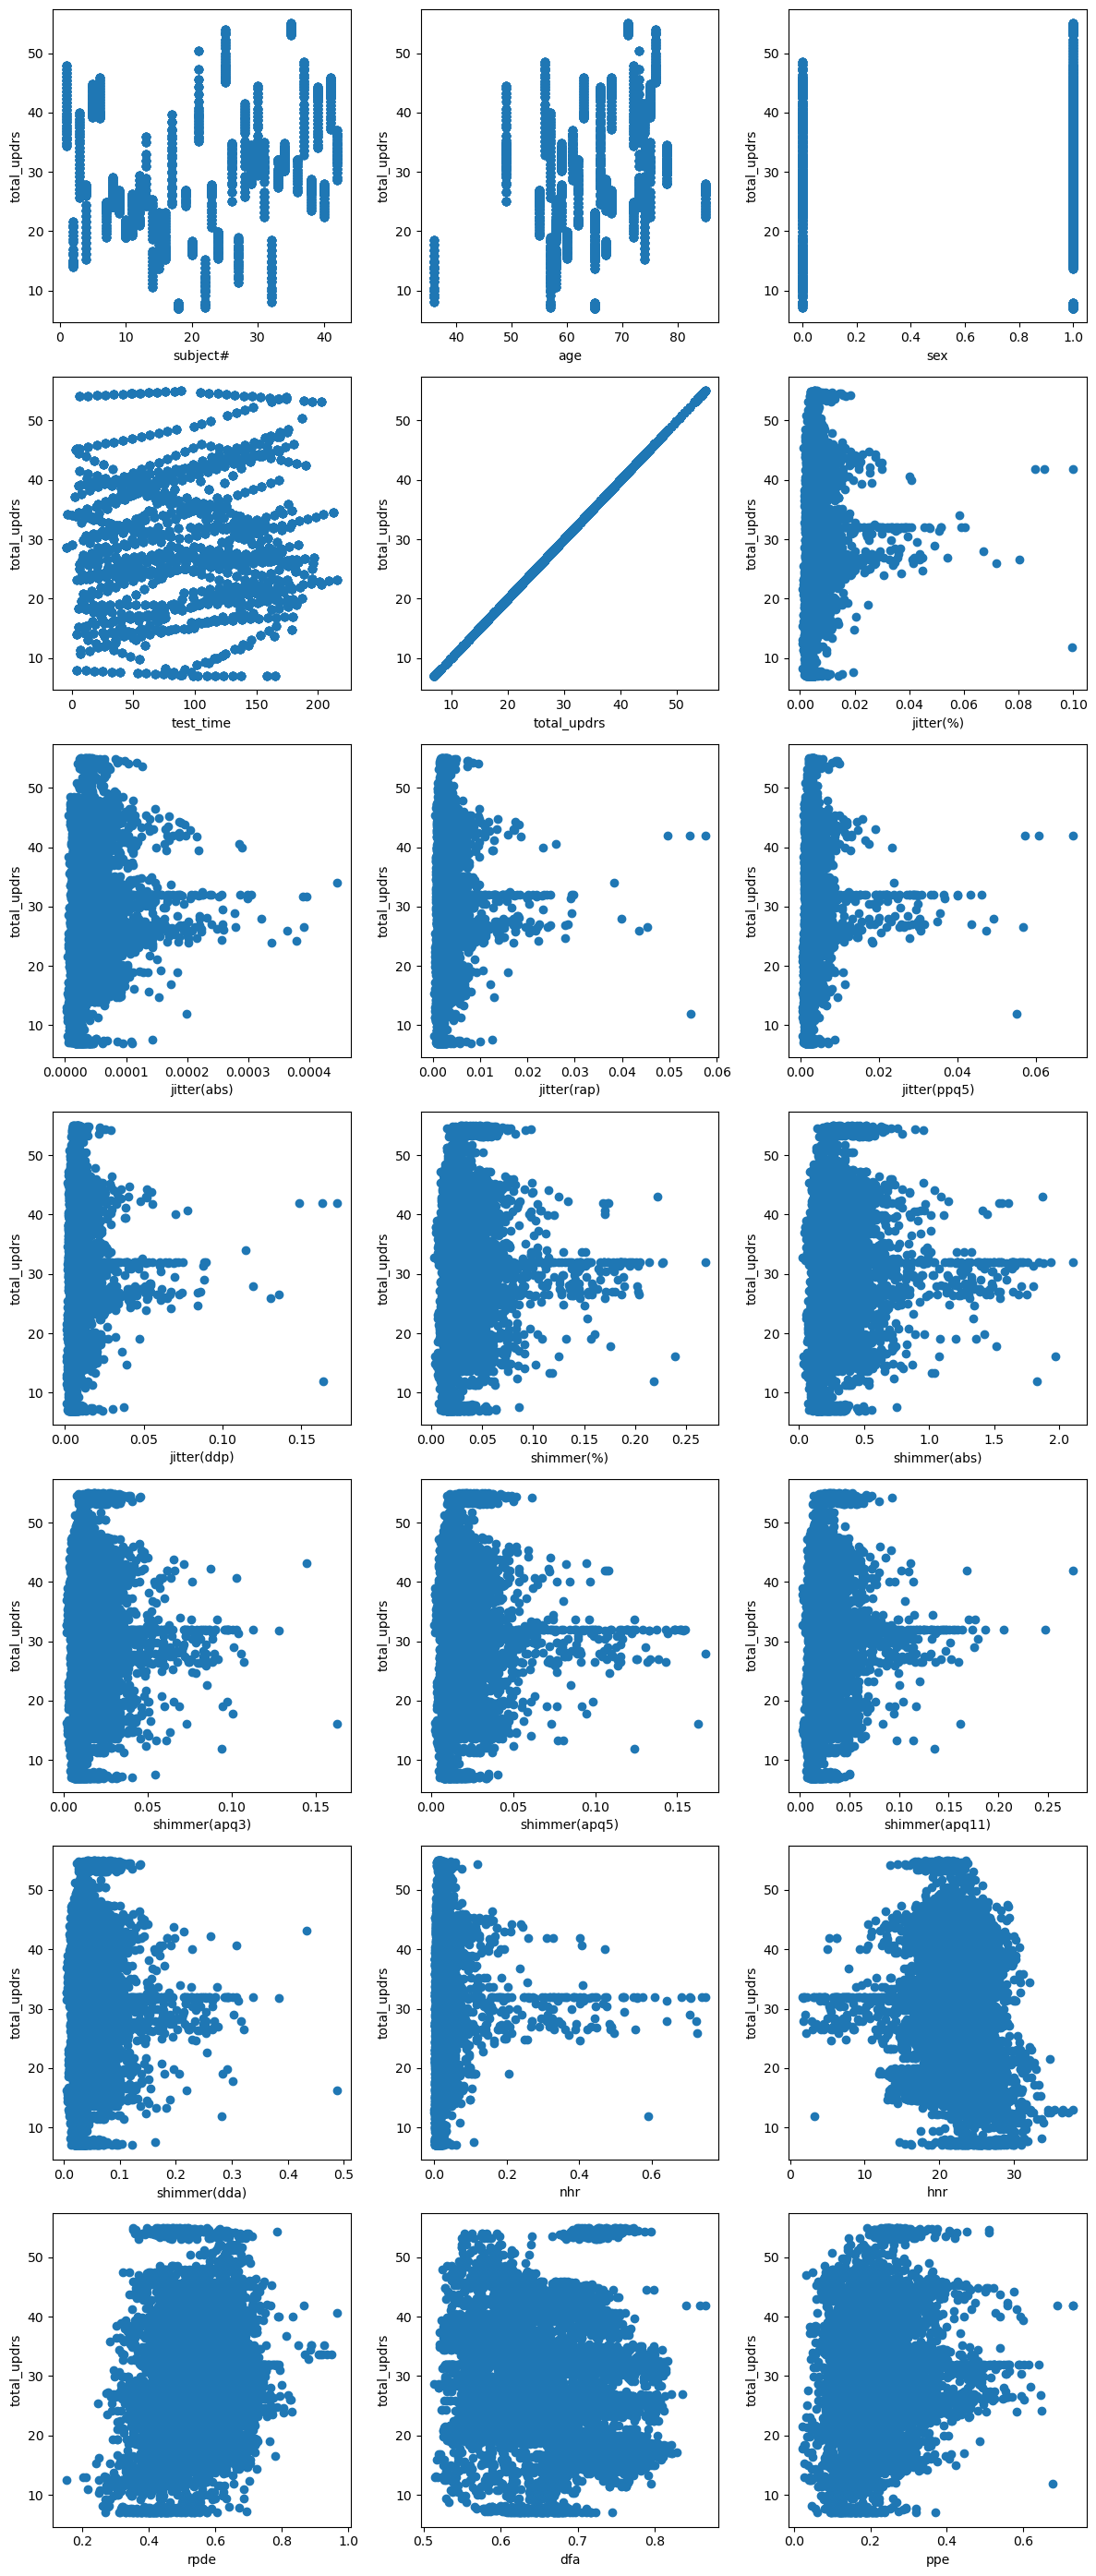

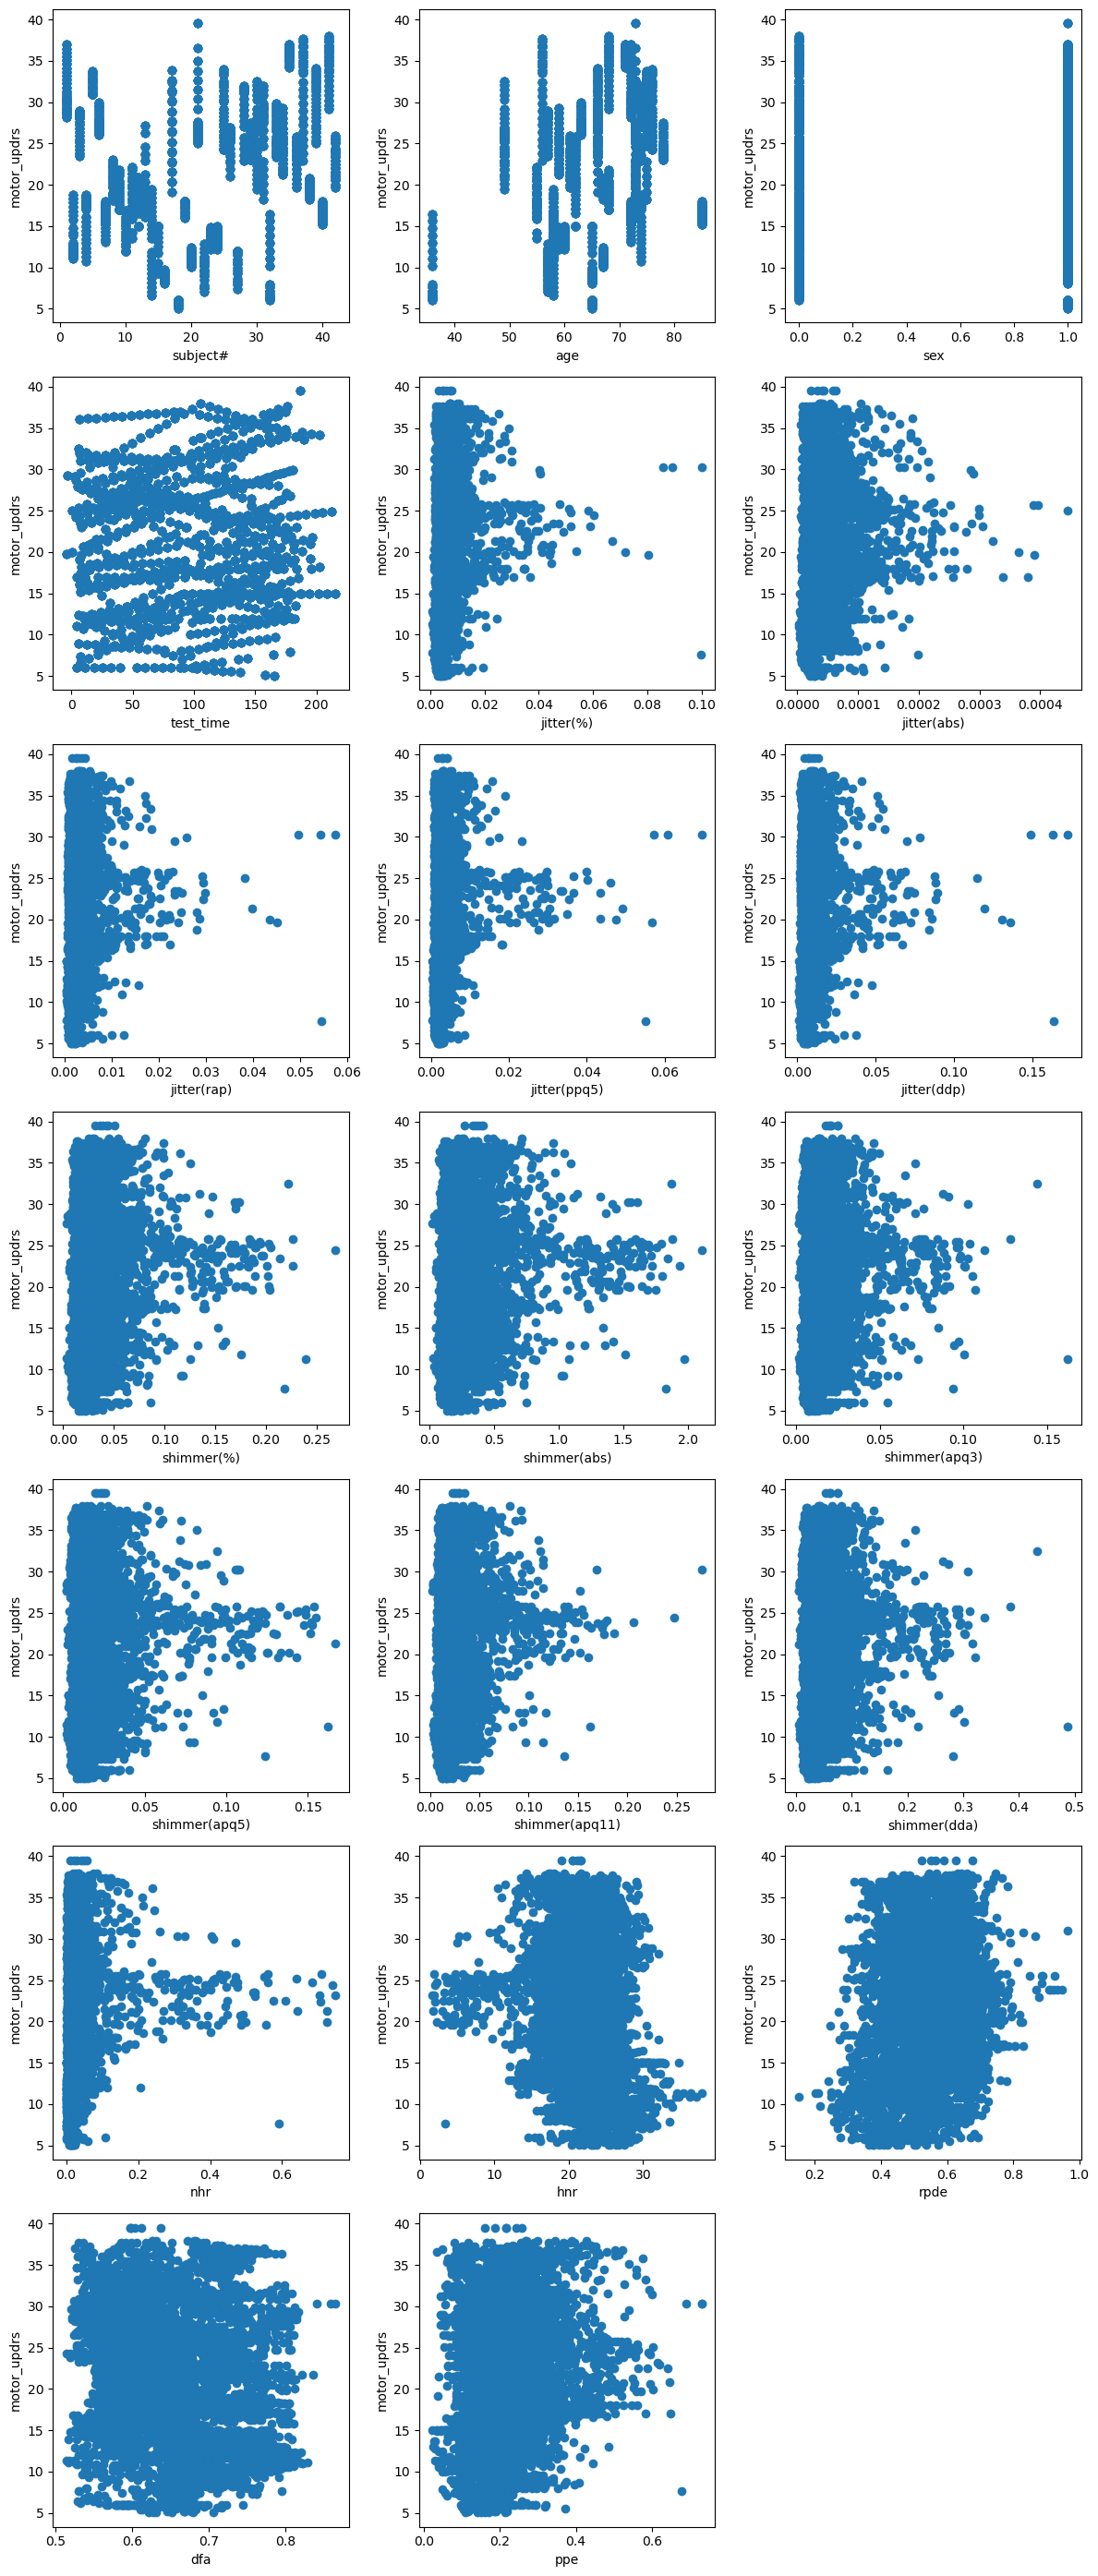

Variance Inflation Factor (VIF):
          Variable          VIF
0         subject#         4.85
1              age        51.42
2              sex         4.56
3        test_time         4.06
4        jitter(%)       194.38
5      jitter(abs)        19.28
6      jitter(rap)   2535233.67
7     jitter(ppq5)        55.01
8      jitter(ddp)   2535668.39
9       shimmer(%)       475.74
10    shimmer(abs)       217.87
11   shimmer(apq3)  64277991.22
12   shimmer(apq5)       130.26
13  shimmer(apq11)        44.42
14    shimmer(dda)  64277147.21
15             nhr        10.29
16             hnr        53.08
17            rpde        45.06
18             dfa        94.45
19             ppe        28.64
Variance Inflation Factor (VIF) after variable removal:
          Variable    VIF
0         subject#   5.26
1              age  57.68
2              sex   4.54
3        test_time   4.07
4      jitter(abs)  12.68
5     jitter(ppq5)  10.69
6   shimmer(apq11)   8.97
7              nhr   7.49
8    

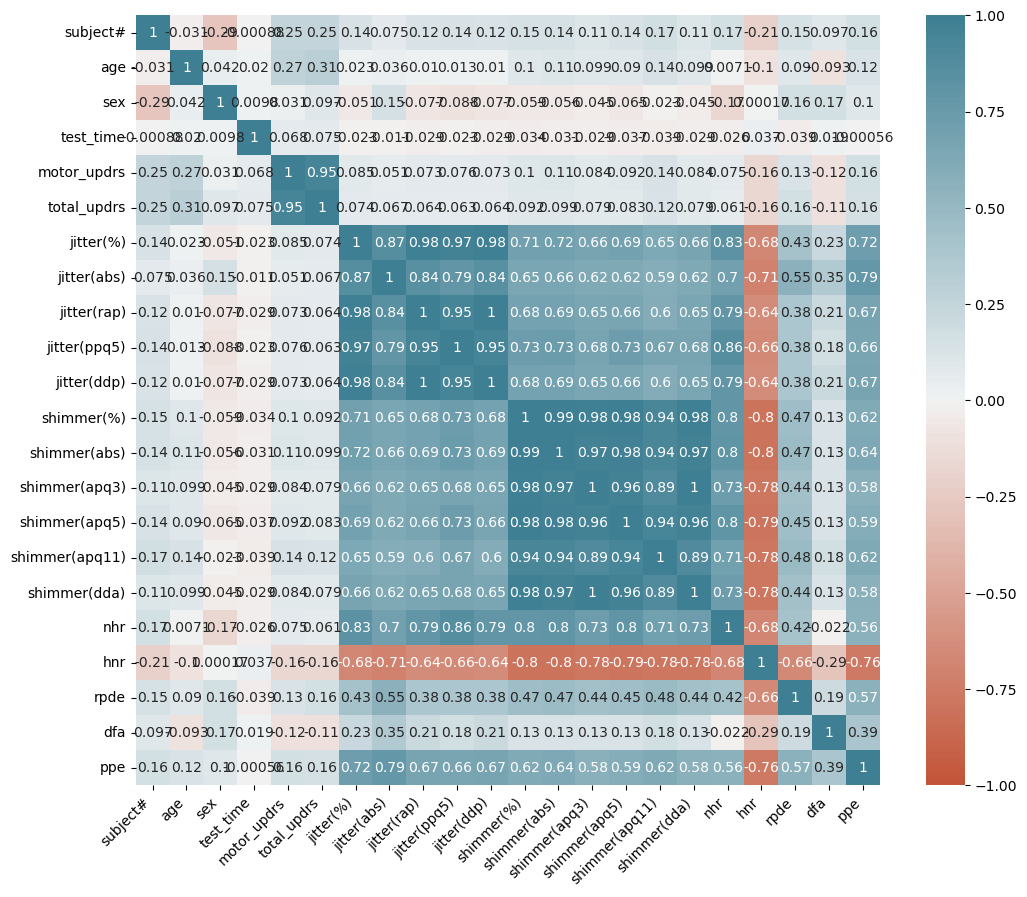

                            OLS Regression Results                            
Dep. Variable:                    ppe   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     975.2
Date:                Thu, 28 Sep 2023   Prob (F-statistic):               0.00
Time:                        15:46:29   Log-Likelihood:                 10132.
No. Observations:                5875   AIC:                        -2.022e+04
Df Residuals:                    5853   BIC:                        -2.007e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2193      0.014     15.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Model summary for Total UPDRS with Transformed Explanatory Variables:
                            OLS Regression Results                            
Dep. Variable:            total_updrs   R-squared:                       0.248
Model:                            OLS   Adj. R-squared:                  0.245
Method:                 Least Squares   F-statistic:                     96.53
Date:                Thu, 28 Sep 2023   Prob (F-statistic):               0.00
Time:                        15:46:29   Log-Likelihood:                -21424.
No. Observations:                5875   AIC:                         4.289e+04
Df Residuals:                    5854   BIC:                         4.303e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------

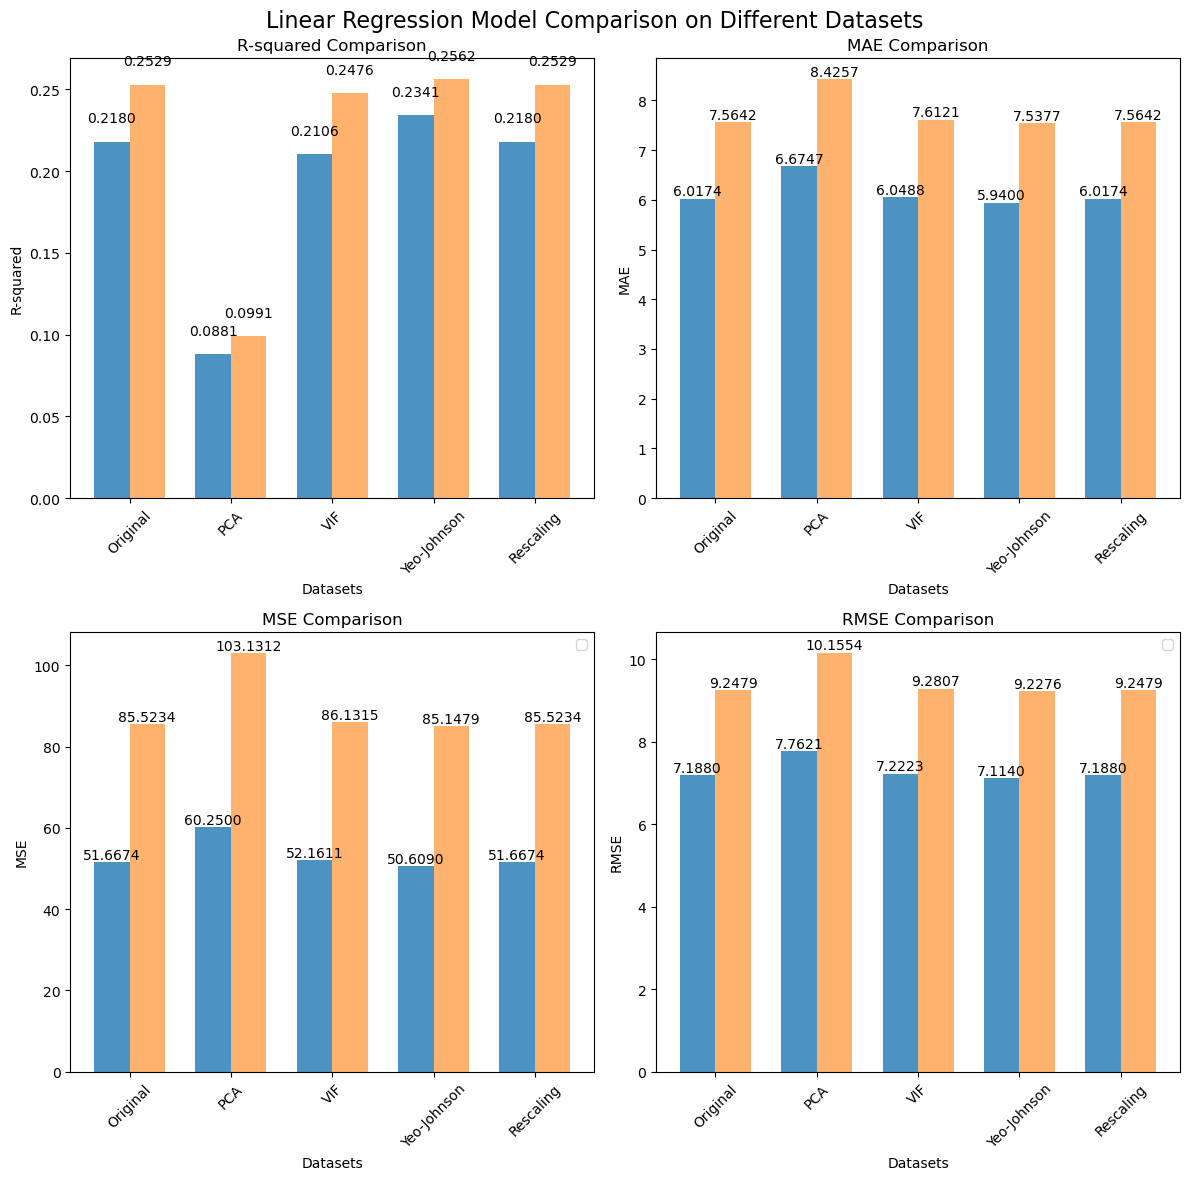

In [10]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import statsmodels.api as sm
import numpy as np
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


# Read a CSV file named "po2_data.csv" located two directories above the current directory and store it in a DataFrame called 'df'.
df = pd.read_csv("po2_data.csv")

# Replace the values in the 'sex' column of the DataFrame with 'Male' replaced by 0 and 'Female' replaced by 1.
df['sex'] = df['sex'].replace({'Male': 0, 'Female': 1})

"""
BUILD AND EVALUATE A LINEAR REGRESSION MODEL
"""

# Extract the feature variables (X) by selecting all columns except the last one, and the target variable (y) by selecting the last column.
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Split the dataset into training and testing sets with 60% for training and 40% for testing, using a random seed for reproducibility.
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=0)

# Create a Linear Regression model.
model = LinearRegression()

# Fit the model to the training data.
model.fit(X_train, y_train)

# Print the intercept and coefficients of the linear regression model.
print("Intercept: ", model.intercept_)
print("Coefficient: ", model.coef_)

# Predict the target variable for the test data.
y_pred = model.predict(X_test)

# Create a DataFrame with actual and predicted values.
df_pred = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})

# Calculate Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), normalized RMSE, and R-squared (R^2) for the linear regression model.
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = math.sqrt(metrics.mean_squared_error(y_test, y_pred))
y_max = y.max()
y_min = y.min()
rmse_norm = rmse / (y_max - y_min)
r_2 = metrics.r2_score(y_test, y_pred)

# Print the performance metrics for the linear regression model.
print("MLP performance:")
print("MAE: ", mae)
print("MSE: ", mse)
print("RMSE: ", rmse)
print("RMSE (Normalized): ", rmse_norm)
print("R^2: ", r_2)

"""
COMPARE THE PERFORMANCE OF THE LINEAR REGRESSION MODEL
VS.
A DUMMY MODEL (BASELINE) THAT USES MEAN AS THE BASIS OF ITS PREDICTION
"""

# Create a baseline prediction by using the mean value of the target variable as the prediction.
y_base = np.mean(y_train)
y_pred_base = [y_base] * len(y_test)

# Create a DataFrame with actual and baseline predicted values.
df_base_pred = pd.DataFrame({"Actual": y_test, "Predicted": y_pred_base})

# Calculate performance metrics for the baseline prediction.
mae = metrics.mean_absolute_error(y_test, y_pred_base)
mse = metrics.mean_squared_error(y_test, y_pred_base)
rmse = math.sqrt(metrics.mean_squared_error(y_test, y_pred_base))
y_max = y.max()
y_min = y.min()
rmse_norm = rmse / (y_max - y_min)
r_2 = metrics.r2_score(y_test, y_pred_base)

# Print the performance metrics for the baseline prediction.
print("Baseline performance:")
print("MAE: ", mae)
print("MSE: ", mse)
print("RMSE: ", rmse)
print("RMSE (Normalized): ", rmse_norm)
print("R^2: ", r_2)

# Save the cleaned_data DataFrame to a CSV file named "cleaned_data.csv" without an index column.
df.to_csv("cleaned_data.csv", index=False)

# Select columns containing numeric data and exclude the "motor_updrs" column.
numeric_columns = df.select_dtypes(include=['number']).columns
numeric_columns = [col for col in numeric_columns if col != "motor_updrs"]

# Calculate the number of rows and columns for plotting the numeric data.
num_plots = len(numeric_columns)
num_cols = 3
num_rows = (num_plots + num_cols - 1) // num_cols

save_directory_total_updrs = 'scatter_plots/total_updrs'
# Create subplots for scatter plots of numeric data against the "total_updrs" column.
plt.figure(figsize=(12, 4 * num_rows))

for i, col in enumerate(numeric_columns):
    plt.subplot(num_rows, num_cols, i + 1)
    plt.scatter(df[col], df['total_updrs'], marker='o')
    plt.xlabel(col)
    plt.ylabel('total_updrs')

# Adjust subplot layout and display the plots.
plt.tight_layout()
plt.savefig(os.path.join(save_directory_total_updrs, 'scatter_plot_total_updrs'))
plt.show()


# Exclude the "total_updrs" column from the numeric columns for plotting.
numeric_columns = [col for col in numeric_columns if col != "total_updrs"]

# Calculate the number of rows and columns for plotting the numeric data.
num_plots = len(numeric_columns)
num_cols = 3
num_rows = (num_plots + num_cols - 1) // num_cols

save_directory_motor = 'scatter_plots/motor_updrs'
# Create subplots for scatter plots of numeric data against the "motor_updrs" column.
plt.figure(figsize=(12, 4 * num_rows))

for i, col in enumerate(numeric_columns):
    plt.subplot(num_rows, num_cols, i + 1)
    plt.scatter(df[col], df['motor_updrs'], marker='o')
    plt.xlabel(col)
    plt.ylabel('motor_updrs')

# Adjust subplot layout and display the plots.
plt.tight_layout()
plt.savefig(os.path.join(save_directory_motor, 'scatter_plot_motor_updrs'))
plt.show()

"""Checking for the Multi-collinearity"""
"""VIF"""

# Create a new DataFrame X without the "motor_updrs" and "total_updrs" columns.
X = df.drop(['motor_updrs', 'total_updrs'], axis=1)

# Create an empty DataFrame to store Variance Inflation Factor (VIF) values.
vif = pd.DataFrame()

# Add a "Variable" column to the VIF DataFrame with column names from X.
vif["Variable"] = X.columns

# Calculate the VIF for each variable and store it in the "VIF" column.
vif["VIF"] = [round(variance_inflation_factor(X.values, i), 2) for i in range(X.shape[1])]

# Print the VIF values for each variable.
print("Variance Inflation Factor (VIF):")
print(vif)

"""Checking for the Multi-collinearity"""
"""Droping Higher VIF"""

# Define a list of variables to drop based on some criteria (e.g., high VIF values).
variables_to_drop = ['jitter(rap)', 'jitter(ddp)', 'shimmer(apq3)', 'shimmer(dda)', 'shimmer(apq5)','shimmer(abs)','shimmer(%)','jitter(%)']

# Create a new DataFrame X_cleaned by dropping the specified variables.
X_cleaned = X.drop(variables_to_drop, axis=1)

# Add the "motor_updrs" and "total_updrs" columns back to X_cleaned.
X_cleaned['motor_updrs'] = df['motor_updrs']
X_cleaned['total_updrs'] = df['total_updrs']

# Calculate VIF values for the variables in X_cleaned after removing the specified variables.
vif_data_after_removal = pd.DataFrame()
vif_data_after_removal["Variable"] = X_cleaned.columns
vif_data_after_removal["VIF"] = [round(variance_inflation_factor(X_cleaned.values, i), 2) for i in range(X_cleaned.shape[1])]

# Print the VIF values for X_cleaned.
print("Variance Inflation Factor (VIF) after variable removal:")
print(vif_data_after_removal)

# Save X_cleaned to a CSV file named "po2_after_VIF.csv" without an index column.
X_cleaned.to_csv("po2_after_VIF.csv", index=False)

# Extract the "motor_updrs" and "total_updrs" columns as target variables.
y_motor_updrs = df['motor_updrs']
y_total_updrs = df['total_updrs']

# Initialize a StandardScaler for standardizing the feature variables.
scaler = StandardScaler()

# Standardize the feature variables in X.
X_standardized = scaler.fit_transform(X)

# Set the number of components for Principal Component Analysis (PCA).
n_components = 5

# Create a PCA model with the specified number of components.
pca = PCA(n_components=n_components)

# Apply PCA to the standardized features.
X_pca = pca.fit_transform(X_standardized)

# Create a DataFrame with the PCA components as columns.
X_pca_df = pd.DataFrame(data=X_pca, columns=X.columns[:n_components])

# Add the "motor_updrs" and "total_updrs" columns back to the PCA DataFrame.
X_pca_df['motor_updrs'] = y_motor_updrs
X_pca_df['total_updrs'] = y_total_updrs

# Save the PCA-transformed DataFrame to a CSV file named "po2_after_PCA.csv" without an index column.
X_pca_df.to_csv("po2_after_PCA.csv", index=False)

# Select the target variables ("motor_updrs" and "total_updrs").
target_variables = df[['motor_updrs', 'total_updrs']]

# Select the feature variables (X) by dropping the target variables.
X = df.drop(['motor_updrs', 'total_updrs'], axis=1)

# Create a preprocessing pipeline with imputation, standardization, and power transformation.
preprocessor = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('power_transform', PowerTransformer(method='yeo-johnson')),
])

# Apply the preprocessing pipeline to the feature variables.
X_transformed = preprocessor.fit_transform(X)

# Create a DataFrame from the transformed features with the original column names.
X_transformed_df = pd.DataFrame(X_transformed, columns=X.columns)

# Concatenate the transformed features with the target variables.
transformed_df = pd.concat([X_transformed_df, target_variables], axis=1)

# Save the transformed DataFrame to a CSV file named 'po2_after_yeo-johnson.csv' without an index column.
transformed_df.to_csv('po2_after_yeo-johnson.csv', index=False)

# Calculate the correlation matrix for the DataFrame.
corr = df.corr()

# Create a heatmap to visualize the correlation matrix.
plt.figure(figsize=(12, 10))  # Adjust the width and height as needed
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=False,
    annot=True
)

# Customize the heatmap by rotating the x-axis labels and adjusting the plot.
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
# plt.figure(figsize=(12, 10))
plt.savefig('heatmap.png')
# Display the heatmap.
plt.show()

"""
BUILD AND EVALUATE LINEAR REGRESSION USING STATSMODELS
"""

# Select the feature variables (X) and target variable (y) for regression analysis.
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

# Add a constant term to the feature variables for the regression model.
x = sm.add_constant(x)

# Fit an Ordinary Least Squares (OLS) regression model.
model = sm.OLS(y,x).fit()

# Predict the target variable using the regression model.
pred = model.predict(x)

# Get details and statistics about the regression model.
model_details = model.summary()

# Print the summary of the regression model.
print(model_details)

"""
REBUILD AND REEVALUATE LINEAR REGRESSION USING STATSMODELS
WITH COLLINEARITY BEING FIXED
"""

# Create a DataFrame X_updrs by removing 'motor_updrs' and 'total_updrs' columns from df
X_updrs = df.drop(['motor_updrs', 'total_updrs'], axis=1)

# Create a StandardScaler instance for feature scaling
scaler = StandardScaler()

# Standardize the features in X_updrs and store the result in X_updrs_std
X_updrs_std = pd.DataFrame(scaler.fit_transform(X_updrs), columns=X_updrs.columns)

# Concatenate 'motor_updrs' and 'total_updrs' columns with the standardized features, creating df_std
df_std = pd.concat([df[['motor_updrs', 'total_updrs']], X_updrs_std], axis=1)

# Save the resulting DataFrame df_std to a CSV file named 'po2_after_rescaling.csv'
df_std.to_csv('po2_after_rescaling.csv', index=False)

# Create a new DataFrame X_motor_updrs without 'motor_updrs' and 'total_updrs' columns
X_motor_updrs = df.drop(['motor_updrs', 'total_updrs'], axis=1)

# Create a Series y_motor_updrs containing the 'motor_updrs' column
y_motor_updrs = df['motor_updrs']

# Create a new DataFrame X_total_updrs without 'motor_updrs' and 'total_updrs' columns
X_total_updrs = df.drop(['motor_updrs', 'total_updrs'], axis=1)

# Create a Series y_total_updrs containing the 'total_updrs' column
y_total_updrs = df['total_updrs']

# Create a PowerTransformer instance for transforming features

scaler = PowerTransformer()

# Transform the features in X_motor_updrs and store the result in X_motor_updrs_transformed
X_motor_updrs_transformed = scaler.fit_transform(X_motor_updrs)

# Create a DataFrame X_motor_updrs_transformed with transformed features and matching column names
X_motor_updrs_transformed_df = pd.DataFrame(X_motor_updrs_transformed, columns=X_motor_updrs.columns)

# Fit an Ordinary Least Squares (OLS) model for 'motor_updrs' with transformed features
model_motor_updrs_transformed = sm.OLS(y_motor_updrs, sm.add_constant(X_motor_updrs_transformed_df)).fit()

# Get and print the summary of the 'motor_updrs' model
model_details_motor_updrs_transformed = model_motor_updrs_transformed.summary()
print("Model summary for Motor UPDRS with Transformed Explanatory Variables:")
print(model_details_motor_updrs_transformed)

# Transform the features in X_total_updrs and store the result in X_total_updrs_transformed
X_total_updrs_transformed = scaler.fit_transform(X_total_updrs)

# Create a DataFrame X_total_updrs_transformed with transformed features and matching column names
X_total_updrs_transformed_df = pd.DataFrame(X_total_updrs_transformed, columns=X_total_updrs.columns)

# Fit an Ordinary Least Squares (OLS) model for 'total_updrs' with transformed features
model_total_updrs_transformed = sm.OLS(y_total_updrs, sm.add_constant(X_total_updrs_transformed_df)).fit()

# Get and print the summary of the 'total_updrs' model
model_details_total_updrs_transformed = model_total_updrs_transformed.summary()
print("Model summary for Total UPDRS with Transformed Explanatory Variables:")
print(model_details_total_updrs_transformed)

# Split the data into training and testing sets for the 'motor_updrs' model
X_train_motor, X_test_motor, y_train_motor, y_test_motor = train_test_split(X_motor_updrs_transformed_df, y_motor_updrs, test_size=0.2, random_state=42)

# Add a constant term to the training features for the 'motor_updrs' model
X_train_motor = sm.add_constant(X_train_motor)

# Fit an OLS model for 'motor_updrs' using the training data
model_motor = sm.OLS(y_train_motor, X_train_motor).fit()

# Get and print the summary of the 'motor_updrs' model
model_details_motor = model_motor.summary()
print("\nModel summary for Motor UPDRS:")
print(model_details_motor)

# Calculate the R-squared value for the 'motor_updrs' model
r_squared_motor = model_motor.rsquared

# Split the data into training and testing sets for the 'total_updrs' model
X_train_total, X_test_total, y_train_total, y_test_total = train_test_split(X_total_updrs_transformed_df, y_total_updrs, test_size=0.2, random_state=42)

# Add a constant term to the training features for the 'total_updrs' model
X_train_total = sm.add_constant(X_train_total)

# Fit an OLS model for 'total_updrs' using the training data
model_total = sm.OLS(y_train_total, X_train_total).fit()

# Get and print the summary of the 'total_updrs' model
model_details_total = model_total.summary()
print("\nModel summary for Total UPDRS:")
print(model_details_total)

# Calculate the R-squared value for the 'total_updrs' model
r_squared_total = model_total.rsquared

# Calculate the mean of 'motor_updrs' values in the training set for the baseline model
y_base_motor = np.mean(y_train_motor)

# Calculate the mean of 'total_updrs' values in the training set for the baseline model
y_base_total = np.mean(y_train_total)

# Create an array of predicted 'motor_updrs' values using the baseline mean for the testing set
y_pred_base_motor = np.full_like(y_test_motor, y_base_motor)

# Create an array of predicted 'total_updrs' values using the baseline mean for the testing set
y_pred_base_total = np.full_like(y_test_total, y_base_total)

# Calculate the Mean Absolute Error (MAE) for the 'motor_updrs' baseline model
mae_base_motor = metrics.mean_absolute_error(y_test_motor, y_pred_base_motor)

# Calculate the Mean Squared Error (MSE) for the 'motor_updrs' baseline model
mse_base_motor = metrics.mean_squared_error(y_test_motor, y_pred_base_motor)

# Calculate the Root Mean Squared Error (RMSE) for the 'motor_updrs' baseline model
rmse_base_motor = math.sqrt(mse_base_motor)

# Calculate the R-squared (R²) value for the 'motor_updrs' baseline model
r2_base_motor = metrics.r2_score(y_test_motor, y_pred_base_motor)

# Calculate the Mean Absolute Error (MAE) for the 'total_updrs' baseline model
mae_base_total = metrics.mean_absolute_error(y_test_total, y_pred_base_total)

# Calculate the Mean Squared Error (MSE) for the 'total_updrs' baseline model
mse_base_total = metrics.mean_squared_error(y_test_total, y_pred_base_total)

# Calculate the Root Mean Squared Error (RMSE) for the 'total_updrs' baseline model
rmse_base_total = math.sqrt(mse_base_total)

# Calculate the R-squared (R²) value for the 'total_updrs' baseline model
r2_base_total = metrics.r2_score(y_test_total, y_pred_base_total)

# Print the R-squared values for the 'motor_updrs' and 'total_updrs' models and their baseline models
print("\nR-squared Values")
print("Motor UPDRS Model:")
print(f"- R-squared (R²): {r_squared_motor:.4f}\n")
print("Total UPDRS Model:")
print(f"- R-squared (R²): {r_squared_total:.4f}\n")
print("Baseline (Dummy) Model for Motor UPDRS:")
print(f"- R-squared (R²): {r2_base_motor:.4f}\n")
print("Baseline (Dummy) Model for Total UPDRS:")
print(f"- R-squared (R²): {r2_base_total:.4f}\n")

# Create a DataFrame X containing all features except 'motor_updrs' and 'total_updrs'
X = df.drop(['motor_updrs', 'total_updrs'], axis=1)

# Create Series y_motor_updrs and y_total_updrs for 'motor_updrs' and 'total_updrs' respectively
y_motor_updrs = df['motor_updrs']
y_total_updrs = df['total_updrs']

# Split the data into training and testing sets for both 'motor_updrs' and 'total_updrs'
X_train, X_test, y_train_motor, y_test_motor, y_train_total, y_test_total = train_test_split(
    X, y_motor_updrs, y_total_updrs, test_size=0.4, random_state=0)

# Create a LinearRegression model for 'motor_updrs'
model_motor = LinearRegression()

# Fit the 'motor_updrs' model using the training data
model_motor.fit(X_train, y_train_motor)

# Create a LinearRegression model for 'total_updrs'
model_total = LinearRegression()

# Fit the 'total_updrs' model using the training data
model_total.fit(X_train, y_train_total)

# Make predictions for 'motor_updrs' using the test data
y_pred_motor = model_motor.predict(X_test)

# Make predictions for 'total_updrs' using the test data
y_pred_total = model_total.predict(X_test)

# Calculate Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE),
# and R-squared (R²) for 'motor_updrs' model performance
mae_motor = metrics.mean_absolute_error(y_test_motor, y_pred_motor)
mse_motor = metrics.mean_squared_error(y_test_motor, y_pred_motor)
rmse_motor = math.sqrt(mse_motor)
r2_motor = metrics.r2_score(y_test_motor, y_pred_motor)

# Calculate Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE),
# and R-squared (R²) for 'total_updrs' model performance
mae_total = metrics.mean_absolute_error(y_test_total, y_pred_total)
mse_total = metrics.mean_squared_error(y_test_total, y_pred_total)
rmse_total = math.sqrt(mse_total)
r2_total = metrics.r2_score(y_test_total, y_pred_total)

# Print the performance metrics for the 'motor_updrs' and 'total_updrs' models
print("Motor UPDRS performance:")
print("MAE: ", mae_motor)
print("MSE: ", mse_motor)
print("RMSE: ", rmse_motor)
print("R^2: ", r2_motor)

print("\nTotal UPDRS performance:")
print("MAE: ", mae_total)
print("MSE: ", mse_total)
print("RMSE: ", rmse_total)
print("R^2: ", r2_total)

# Calculate the baseline mean for 'motor_updrs' and 'total_updrs'
y_base_motor = np.mean(y_train_motor)
y_base_total = np.mean(y_train_total)

# Create arrays of predicted values using the baseline mean for both 'motor_updrs' and 'total_updrs'
y_pred_base_motor = np.full_like(y_test_motor, y_base_motor)
y_pred_base_total = np.full_like(y_test_total, y_base_total)

# Calculate Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE),
# and R-squared (R²) for the 'motor_updrs' baseline model
mae_base_motor = metrics.mean_absolute_error(y_test_motor, y_pred_base_motor)
mse_base_motor = metrics.mean_squared_error(y_test_motor, y_pred_base_motor)
rmse_base_motor = math.sqrt(mse_base_motor)
r2_base_motor = metrics.r2_score(y_test_motor, y_pred_base_motor)

# Calculate Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE),
# and R-squared (R²) for the 'total_updrs' baseline model
mae_base_total = metrics.mean_absolute_error(y_test_total, y_pred_base_total)
mse_base_total = metrics.mean_squared_error(y_test_total, y_pred_base_total)
rmse_base_total = math.sqrt(mse_base_total)
r2_base_total = metrics.r2_score(y_test_total, y_pred_base_total)

# Print the performance metrics for the 'motor_updrs' and 'total_updrs' baseline models
print("\nBaseline (Dummy) Model Performance for Motor UPDRS:")
print("MAE: ", mae_base_motor)
print("MSE: ", mse_base_motor)
print("RMSE: ", rmse_base_motor)
print("R^2: ", r2_base_motor)

print("\nBaseline (Dummy) Model Performance for Total UPDRS:")
print("MAE: ", mae_base_total)
print("MSE: ", mse_base_total)
print("RMSE: ", rmse_base_total)
print("R^2: ", r2_base_total)

# Create a dictionary 'datasets' containing different datasets loaded from CSV files
datasets = {
    'Original': pd.read_csv('original.csv'),
    'PCA': pd.read_csv('po2_after_PCA.csv'),
    'VIF': pd.read_csv('po2_after_VIF.csv'),
    'Yeo-Johnson': pd.read_csv('po2_after_yeo-johnson.csv'),
    'Rescaling': pd.read_csv('po2_after_rescaling.csv'),
}

# Create LinearRegression models for 'motor_updrs' and 'total_updrs'
motor_updrs_model = LinearRegression()
total_updrs_model = LinearRegression()

# Create empty lists to store performance metrics
r2_scores_motor_updrs = []
r2_scores_total_updrs = []
mae_motor_updrs = []
mae_total_updrs = []
mse_motor_updrs = []
mse_total_updrs = []
rmse_motor_updrs = []
rmse_total_updrs = []

# Get the names of the datasets from the keys of the 'datasets' dictionary
dataset_names = list(datasets.keys())

# Iterate through each dataset and calculate performance metrics
for dataset_name, dataset in datasets.items():
    # Extract features (X) and target variables (y_motor_updrs and y_total_updrs)
    X = dataset.drop(['motor_updrs', 'total_updrs'], axis=1)
    y_motor_updrs = dataset['motor_updrs']
    y_total_updrs = dataset['total_updrs']
    
    # Fit the 'motor_updrs' model and make predictions
    motor_updrs_model.fit(X, y_motor_updrs)
    y_motor_updrs_pred = motor_updrs_model.predict(X)
    
    # Calculate R-squared, MAE, MSE, and RMSE for 'motor_updrs' model
    r2_motor_updrs = r2_score(y_motor_updrs, y_motor_updrs_pred)
    r2_scores_motor_updrs.append(r2_motor_updrs)
    mae_motor_updrs.append(mean_absolute_error(y_motor_updrs, y_motor_updrs_pred))
    mse_motor_updrs.append(mean_squared_error(y_motor_updrs, y_motor_updrs_pred))
    rmse_motor_updrs.append(np.sqrt(mean_squared_error(y_motor_updrs, y_motor_updrs_pred)))
    
    # Fit the 'total_updrs' model and make predictions
    total_updrs_model.fit(X, y_total_updrs)
    y_total_updrs_pred = total_updrs_model.predict(X)
    
    # Calculate R-squared, MAE, MSE, and RMSE for 'total_updrs' model
    r2_total_updrs = r2_score(y_total_updrs, y_total_updrs_pred)
    r2_scores_total_updrs.append(r2_total_updrs)
    mae_total_updrs.append(mean_absolute_error(y_total_updrs, y_total_updrs_pred))
    mse_total_updrs.append(mean_squared_error(y_total_updrs, y_total_updrs_pred))
    rmse_total_updrs.append(np.sqrt(mean_squared_error(y_total_updrs, y_total_updrs_pred)))

# Create a dictionary 'metrics' to store the performance metrics
metrics = {
    'R-squared': (r2_scores_motor_updrs, r2_scores_total_updrs),
    'MAE': (mae_motor_updrs, mae_total_updrs),
    'MSE': (mse_motor_updrs, mse_total_updrs),
    'RMSE': (rmse_motor_updrs, rmse_total_updrs)
}

# Create a 2x2 grid of subplots for visualization
fig, axs = plt.subplots(2, 2, figsize=(12, 12))
fig.suptitle('Linear Regression Model Comparison on Different Datasets', fontsize=16)

handles = []
labels = []

# Iterate through performance metrics and corresponding subplots
for (metric_name, (motor_data, total_data)), ax in zip(metrics.items(), axs.flatten()):
    width = 0.35
    x = np.arange(len(dataset_names))

    # Create bar plots for 'motor_updrs' and 'total_updrs' and annotate the values
    motor_bars = ax.bar(x - width/2, motor_data, width, alpha=0.8)
    total_bars = ax.bar(x + width/2, total_data, width, alpha=0.6)

    for i, j in zip(x, motor_data):
        ax.text(i - width/2, j + 0.01, f'{j:.4f}', ha='center', va='bottom')
    for i, j in zip(x, total_data):
        ax.text(i + width/2, j + 0.01, f'{j:.4f}', ha='center', va='bottom')

    # Set labels, titles, and ticks for the subplots
    ax.set_xlabel('Datasets')
    ax.set_ylabel(metric_name)
    ax.set_title(f'{metric_name} Comparison')
    ax.set_xticks(x)
    ax.set_xticklabels(dataset_names, rotation=45)
    
    # Extend handles and labels for legends
    if ax == axs[0, 1]:
        handles.extend([motor_bars, total_bars])
        labels.extend(['motor_updrs', 'total_updrs'])

# Show legends in the subplots
for ax in axs[1:].flatten():
    ax.legend().set_visible(True)

# Adjust layout and display the plot
plt.tight_layout(rect=[0, 0, 1, 1])
plt.savefig('linear_regression_comparison.png')
plt.show()
